In [2]:
#Import some libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import sys
if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")
from sklearn.metrics import r2_score, confusion_matrix, accuracy_score, precision_score, classification_report, plot_confusion_matrix
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV, cross_val_score, cross_validate
from sklearn import ensemble, tree, svm, naive_bayes, neighbors, linear_model, gaussian_process, neural_network

from sklearn.linear_model import LogisticRegression, LassoCV
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB, BernoulliNB
%matplotlib inline

In [3]:
#import data
train = pd.read_csv('Train.csv')
test=  pd.read_csv('Test.csv')
submission = pd.read_csv('SampleSubmission.csv')

In [4]:
# CHECK FOR COLUMN IN TRAIN DATASET NOT AVAILABLE IN TEST DATASET
target = [col for col in train.columns if col not in test.columns]
target

['Potability']

In [5]:
# JOIN THE TRAIN AND TEST DATASETS
#df_list = [train, test]
#df = pd.concat(df_list)
#df

In [6]:
#Check for missing values in training data
train.isnull().sum()

region_area_         0
ph                 336
Hardness             0
Solids               0
Chloramines          0
Sulfate            547
Conductivity         0
Organic_carbon       0
Trihalomethanes    111
Turbidity            0
Potability           0
dtype: int64

In [7]:
# FILL EMPTY COLUMNS WITH ZERO
train['ph'].fillna(0.0, inplace=True)
train['Sulfate'].fillna(0.0, inplace=True)
train['Trihalomethanes'].fillna(0.0, inplace=True)

In [8]:
test['ph'].fillna(0.0, inplace=True)
test['Sulfate'].fillna(0.0, inplace=True)
test['Trihalomethanes'].fillna(0.0, inplace=True)



In [9]:
train.isnull().sum()

region_area_       0
ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

In [10]:
test.isnull().sum()

region_area_       0
ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
dtype: int64

In [11]:
test.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
count,1016.000000,1016.000000,1016.000000,1016.000000,1016.000000,1016.000000,1016.000000,1016.000000,1016.000000
mean,5.995317,247.460258,21821.921001,6.850280,257.340634,435.726589,14.458693,63.323158,3.961470
std,2.936259,32.256846,8632.753833,1.562552,145.068168,81.257054,3.331036,21.231423,0.787713
min,0.000000,98.205891,729.055640,1.086060,0.000000,191.588754,2.305000,0.000000,1.496101
25%,5.322804,228.453631,15412.001500,5.891916,254.219906,375.045634,12.231513,53.822394,3.426879
50%,6.653237,248.207598,20425.683193,6.807689,319.914076,429.830549,14.308943,65.790779,3.928238
75%,7.831606,266.930167,27287.213813,7.826017,351.235292,491.194353,16.714639,76.647767,4.489146
max,14.000000,358.479915,52319.222108,12.322089,459.186185,763.447620,27.111707,118.472275,6.494249


In [12]:
train.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2260.000000,2260.000000,2260.000000,2260.000000,2260.000000,2260.000000,2260.000000,2260.000000,2260.000000,2260.000000
mean,6.030429,247.000935,22100.926521,6.802715,253.615724,436.572437,14.359075,63.176919,3.969176,0.388496
std,2.919358,33.162065,8829.474740,1.592352,147.982731,80.645313,3.298100,21.437043,0.777228,0.487516
min,0.000000,124.266124,321.247422,0.047189,0.000000,211.724737,4.476899,0.000000,1.450000,0.000000
25%,5.279300,226.799112,15761.393491,5.800652,229.843193,376.894507,12.154291,53.926506,3.444178,0.000000
50%,6.758754,247.379235,21149.453853,6.828266,318.832122,432.813965,14.325645,65.451727,3.962502,0.000000
75%,7.876045,267.798367,27347.271380,7.802569,351.084910,492.076858,16.625857,76.827376,4.502519,1.000000
max,13.541240,373.897891,61227.500818,12.822189,481.775755,718.331364,28.405000,124.115000,6.739000,1.000000


In [13]:
submission.head()

,region_area_,Potability
0,region_area_0,1
1,region_area_10,1
2,region_area_1006,1
3,region_area_1010,1
4,region_area_1011,1


0    1382
1     878
Name: Potability, dtype: int64


Text(0.5, 0, 'Potability')

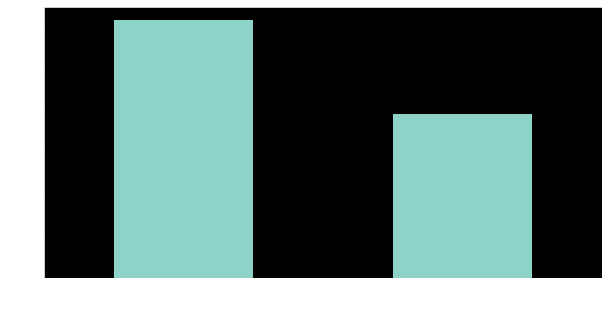

In [14]:
#Check if the predictor class is balanced 
print(train['Potability'].value_counts())
plt.figure(figsize=(10,5))
train['Potability'].value_counts(normalize=True).plot(kind='bar')
plt.ylabel('counts')
plt.xlabel('Potability')

## Machine Learning

In [15]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
train.region_area_ = encoder.fit_transform(train.region_area_)
test.region_area_ = encoder.fit_transform(test.region_area_)

In [16]:
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import accuracy_score,confusion_matrix,recall_score,precision_recall_curve, f1_score, roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

In [17]:
outcome = train['Potability']
outcomes = outcome.values.reshape(-1,1)
features = train.drop('Potability', axis=True)

In [18]:
scaler = StandardScaler()
x = scaler.fit_transform(features)



In [19]:
# FOR TRAIN
X_train, X_test, y_train, y_test = train_test_split(x,
                                                    outcomes,
                                                    test_size=0.2, 
                                                    random_state=50)




# DECISION TREE

In [20]:
def model_evaluate(model, test):
    y_pred = model.predict(test) # could also be written as y_pred = model.predict(test)
    print(classification_report(y_test, y_pred))
    cm = confusion_matrix(y_test, y_pred)

    categories = ['Potable', 'Not Potable']
    
    sns.heatmap(cm, cmap = 'Blues', fmt = '', annot = True,
                xticklabels = categories, yticklabels = categories)

    plt.xlabel("Predicted values", fontdict = {'size':14}, labelpad = 10)
    plt.ylabel("Actual values"   , fontdict = {'size':14}, labelpad = 10)
    plt.title ("Confusion Matrix", fontdict = {'size':18}, pad = 20)

              precision    recall  f1-score   support

           0       0.98      0.96      0.97       274
           1       0.93      0.97      0.95       178

    accuracy                           0.96       452
   macro avg       0.96      0.96      0.96       452
weighted avg       0.96      0.96      0.96       452

Train Score :  0.9457958995623127
Test Score :  0.9341760915810899


DecisionTreeClassifier(max_depth=50, min_samples_leaf=50, min_samples_split=100)

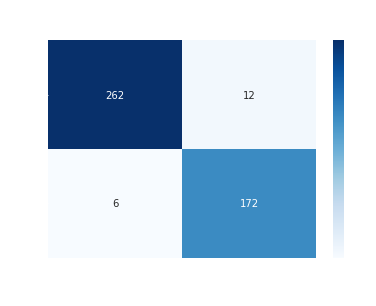

In [21]:
# model1 predictions
model1 = DecisionTreeClassifier(max_depth=50, min_samples_leaf=50, min_samples_split=100)
scores = cross_validate(model1, X_train, y_train, return_train_score=True, n_jobs=-1)
evaluation = [( X_train, y_train), ( X_test, y_test)]
model1.fit(X_train, y_train)

model_evaluate(model1, X_test)
print("Train Score : ", np.mean(scores['train_score']))
print("Test Score : ", np.mean(scores['test_score']))
model1.fit(X_train, y_train)


# MODEL 1 PREDICTIONS
pred = model1.predict(X_train)
pred2 = model1.predict(X_test)

# Calculate the accuracy
from sklearn.metrics import accuracy_score
train_accuracy = accuracy_score(y_train,
                                pred)
test_accuracy = accuracy_score(y_test,
                               pred2)
print('The training accuracy is', train_accuracy)
print('The test accuracy is', test_accuracy)


cnf_matrix = confusion_matrix(y_test, pred2)

sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu", fmt='g')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')

print(classification_report(y_test, pred2))

# XGBOOST 

In [22]:
kfold = StratifiedKFold(n_splits=10)

              precision    recall  f1-score   support

           0       0.98      0.96      0.97       274
           1       0.94      0.97      0.96       178

    accuracy                           0.96       452
   macro avg       0.96      0.97      0.96       452
weighted avg       0.97      0.96      0.96       452

Train Score :  1.0
Test Score :  0.9363829754671645


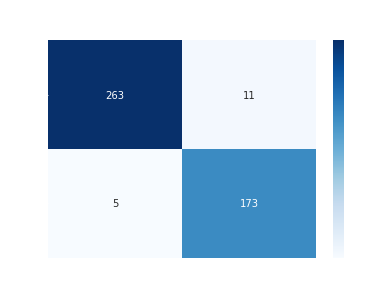

In [23]:
model2 = XGBClassifier(n_estimators = 100, eval_metric='logloss', use_label_encoder=False)
scores = cross_validate(model2, X_train, y_train, return_train_score=True, n_jobs=-1)
evaluation = [(X_train, y_train), (X_test, y_test)]
model2.fit(X_train, y_train)

model_evaluate(model2, X_test)
print("Train Score : ", np.mean(scores['train_score']))
print("Test Score : ", np.mean(scores['test_score']))


# SVM CLASSIFIER

In [25]:
# SVC Classifier
SVC = svm.SVC(probability=True)
svc_param = {
    'kernel': ['rbf'], 
    'gamma': [ 0.001, 0.01, 0.1, 1],
    'C': [1, 10, 50, 100,200,300, 1000]
    }

gsSVC = GridSearchCV(SVC, param_grid = svc_param, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 3)

# Best score
gsSVC.fit(X_train,y_train)

# print best parameter after tuning
print(gsSVC.best_params_)

# print how our model looks like after hyperparameter tuning 
SVC_best = gsSVC.best_estimator_
print(SVC_best)


# Best score
print(gsSVC.best_score_)

Fitting 10 folds for each of 28 candidates, totalling 280 fits
{'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
SVC(C=10, gamma=0.1, probability=True)
0.6300030693677103


# XGBOOST CLASSIFIER

In [38]:
XGB = XGBClassifier()
xgb_param = {
    'eval_metric':['logloss'],
    'n_estimators' : [100,200,300],
    'gamma': [ 0.0001, 0.001, 0.01, 0.1],
    'learning_rate': [0.1, 0.05, 0.01],
    'max_depth': [4, 8],
    }
xgXGB = GridSearchCV(XGB, param_grid = xgb_param, cv=kfold, scoring="accuracy", verbose = 1)
xgXGB.fit(X_train, y_train)
XGB_best = xgXGB.best_estimator_

# Best score
xgXGB.best_score_

Fitting 10 folds for each of 72 candidates, totalling 720 fits


0.9430356046654389

# GRADIENT BOOST CLASSIFIER

In [37]:
# Gradient Boosting Classifier
GB = ensemble.GradientBoostingClassifier()
gb_param = {
        'loss' : ["deviance"],
        'n_estimators' : [100,200,300],
        'criterion': ['friedman_mse'],
        'learning_rate': [0.01, 0.1, 0.05],
        'max_depth': [4, 8],
        'min_samples_leaf': [100,150],
        'max_leaf_nodes':[5],
        'max_features': [0.3, 0.1] 
        }

gsGB = GridSearchCV(GB, param_grid = gb_param, cv=kfold, scoring="accuracy", verbose = 1)
gsGB.fit(X_train,y_train)
GB_best = gsGB.best_estimator_

# Best score
gsGB.best_score_

Fitting 10 folds for each of 72 candidates, totalling 720 fits


0.9020994475138122

# MODEL ASSEMBLY

In [41]:
vc = ensemble.VotingClassifier(
    estimators = [('gbc',GB_best), ('svc', SVC_best), ('xgb', XGB_best)],
    weights = [6, 5, 7], voting='soft')

In [42]:
vc = vc.fit(X_train, y_train)
pred = vc.predict(X_test)
acc = accuracy_score(y_test, pred) #Other way: vc.score(X_test, y_test)
f1 = f1_score(y_test, pred)
cv = cross_val_score(vc, X_test, y_test).mean()

print("Accuracy: ", round(acc*100,2), 
     "\n F1-Score: ", round(f1*100,2), 
     "\n CV Score: ", round(cv*100,2))

Accuracy:  96.02 
 F1-Score:  95.03 
 CV Score:  85.85


In [43]:
ada = ensemble.AdaBoostClassifier(base_estimator=XGB_best)
ada.fit(X_train, y_train)

lg = linear_model.LogisticRegressionCV()
lg.fit(X_train, y_train)

vc2 = ensemble.VotingClassifier(
    estimators = [('ada', ada), ('lg',lg), ('VotingClassifier', vc)],
    voting='soft')
vc2.fit(X_train, y_train)

VotingClassifier(estimators=[('ada',
                              AdaBoostClassifier(base_estimator=XGBClassifier(base_score=0.5,
                                                                              booster='gbtree',
                                                                              colsample_bylevel=1,
                                                                              colsample_bynode=1,
                                                                              colsample_bytree=1,
                                                                              enable_categorical=False,
                                                                              eval_metric='logloss',
                                                                              gamma=0.0001,
                                                                              gpu_id=-1,
                                                                              importance_typ

In [44]:
y_scores = vc2.predict_proba(X_test)
y_scores = y_scores[:,1]
auroc = roc_auc_score(y_test, y_scores)
print("ROC-AUC Score:", auroc)

ROC-AUC Score: 0.9837816780119741


In [48]:
Id = submission['region_area_']

print("train")
print(X_train.shape)
print(y_train.shape)
print("+"*7)
print("test")
print(X_test.shape)
print(y_test.shape)
print("+"*7)
print("validation")
print(X_val.shape)
print(y_val.shape)

In [49]:
pred = vc2.predict(test).astype(int)
target = pd.Series(pred, name='Potability')

output = pd.concat({'region_area_':Id, 'Survived':target}
                   ,axis='columns')

output.to_csv('submission 1.csv', index=False, header=True)

In [ ]:
# 1. Do more feature engineering
# 2. Handle the imbalance nature of the predictor class 
# 3. Use other algorithms
# 4. Tune hyperparameters of this model
# 5. Handle missing values properly
# 6. Any other thing you feel can improve the performance of the model is good to go
